In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("restaurant_data.csv", index_col = 'Name')

In [3]:
df.head()

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
Name,,,,,,,,,,,,,,,,
Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8368 entries, Restaurant 0 to Restaurant 8367
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                8368 non-null   object 
 1   Cuisine                 8368 non-null   object 
 2   Rating                  8368 non-null   float64
 3   Seating Capacity        8368 non-null   int64  
 4   Average Meal Price      8368 non-null   float64
 5   Marketing Budget        8368 non-null   int64  
 6   Social Media Followers  8368 non-null   int64  
 7   Chef Experience Years   8368 non-null   int64  
 8   Number of Reviews       8368 non-null   int64  
 9   Avg Review Length       8368 non-null   float64
 10  Ambience Score          8368 non-null   float64
 11  Service Quality Score   8368 non-null   float64
 12  Parking Availability    8368 non-null   object 
 13  Weekend Reservations    8368 non-null   int64  
 14  Weekday Reservations   

In [5]:
df.duplicated().any()

False

In [6]:
df.isna().sum()

Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [7]:

# A longer and higher-rated review may signal strong customer satisfaction.
df["Review Quality Score"] = df["Avg Review Length"] * df["Rating"]

# Price category
df["Meal Price Category"] = pd.cut(df["Average Meal Price"],
                                   bins=[0, 30, 60, 100],
                                   labels=["Low", "Medium", "High"])

# Drop unused/redundant columns
df.drop(columns=["Average Meal Price"], inplace=True)
df.drop(columns=["Avg Review Length"], inplace=True)
df.drop(columns=["Rating"], inplace=True)


In [8]:
X = df.drop('Revenue',axis=1)
Y = df['Revenue']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=1000)

In [10]:
y_test.shape

(2511,)

In [11]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Rural', 'Suburban', 'Downtown']])
X_train[['Location']] = encoder.fit_transform(X_train[['Location']])
X_train['Location'] = X_train['Location'].astype(int)

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
X_train[["Meal Price Category"]] = encoder.fit_transform(X_train[["Meal Price Category"]])
X_train["Meal Price Category"] = X_train["Meal Price Category"].astype(int)

In [13]:
X_train.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 1649,0,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,2
Restaurant 1052,1,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,1
Restaurant 2520,1,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,1
Restaurant 5818,2,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,1
Restaurant 1727,0,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,1


## Cluster Analysis

In [14]:
# Load data
data = X_train

In [15]:
data.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category
Name,,,,,,,,,,,,,,
Restaurant 1649,0,Japanese,49,3259,34243,6,109,4.2,5.5,Yes,24,11,810.583476,2
Restaurant 1052,1,Indian,55,2662,34744,4,826,1.8,4.6,Yes,27,24,500.508350,1
Restaurant 2520,1,Italian,60,1515,19829,13,207,8.5,3.5,Yes,44,51,699.115449,1
Restaurant 5818,2,Italian,90,5031,58655,13,805,3.5,9.6,Yes,86,29,817.414508,1
Restaurant 1727,0,Italian,35,1778,24218,1,234,5.6,5.8,No,0,7,576.446525,1


In [16]:
data.shape

(5857, 14)

In [17]:
# Specify categorical columns (by name or index)
categorical_cols = ['Cuisine', 'Parking Availability']  
ordinal_categorical = ['Location', 'Meal Price Category','Cuisine', 'Parking Availability']
numerical_cols = [col for col in data.columns if col not in ordinal_categorical]

# Convert categorical columns to strings (required for K-Prototypes)
data[categorical_cols] = data[categorical_cols].astype(str)

# Scale numerical features (critical for distance calculations)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Get categorical column indices
categorical_idx = [data.columns.get_loc(col) for col in categorical_cols]



In [18]:
categorical_idx

[1, 9]

In [19]:
# Convert dataframe to matrix
dfMatrix = data.to_numpy()

## K-Prototype Clustering

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6


<function matplotlib.pyplot.show(close=None, block=None)>

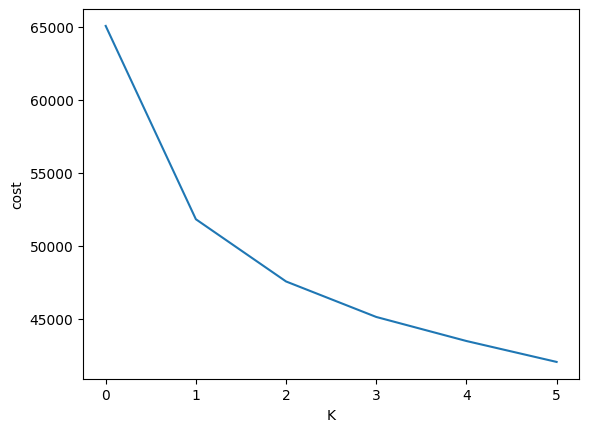

In [20]:
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 7):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 42,gamma=0.1)
        kprototype.fit_predict(dfMatrix, categorical = categorical_idx)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

### Find Optimal Clusters

In [21]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,7), 
        y=cost, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 2 clusters


Text(0.5, 1.0, 'Gamma Tuning Curve')

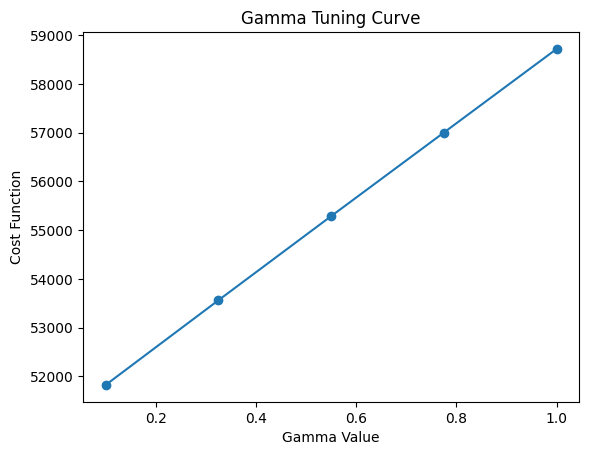

In [22]:
from kmodes.kprototypes import KPrototypes

# Test gamma values
gammas = np.linspace(0.1, 1.0, 5)
costs = []

for gamma in gammas:
    kproto = KPrototypes(n_clusters=2, gamma=gamma, init='Cao')
    kproto.fit(dfMatrix, categorical=[1, 9])  
    costs.append(kproto.cost_)

# Plot results
plt.plot(gammas, costs, marker='o')
plt.xlabel('Gamma Value')
plt.ylabel('Cost Function')
plt.title('Gamma Tuning Curve')

In [23]:
# Find the index of the minimum cost
min_index = np.argmin(costs)

# Get the gamma and cost at that index
best_gamma = gammas[min_index]
lowest_cost = costs[min_index]

print(f"Lowest cost is {lowest_cost} at gamma = {best_gamma}")

Lowest cost is 51823.491744689505 at gamma = 0.1


In [24]:
#let's build the Kprototype model with 2 clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 1000 ,gamma=0.1)
data['clusters']= kprototype.fit_predict(dfMatrix, categorical = categorical_idx)


In [25]:
data['clusters']

Name
Restaurant 1649    1
Restaurant 1052    1
Restaurant 2520    1
Restaurant 5818    0
Restaurant 1727    1
                  ..
Restaurant 769     1
Restaurant 2398    1
Restaurant 3776    1
Restaurant 6215    1
Restaurant 4695    1
Name: clusters, Length: 5857, dtype: uint16

In [26]:
#predict the labels of clusters.
label = kprototype.fit_predict(dfMatrix, categorical = categorical_idx)
print(label)

[1 1 1 ... 1 1 1]


In [27]:
data.head()

,Location,Cuisine,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Review Quality Score,Meal Price Category,clusters
Name,,,,,,,,,,,,,,,
Restaurant 1649,0,Japanese,-0.634164,0.022924,-0.106408,-0.722542,-1.504662,-0.520297,0.012226,Yes,-0.278235,-0.919097,0.348328,2,1
Restaurant 1052,1,Indian,-0.288299,-0.305758,-0.079374,-1.085253,1.084756,-1.454932,-0.335381,Yes,-0.127228,-0.265472,-0.655155,1,1
Restaurant 2520,1,Italian,-0.000079,-0.937244,-0.884174,0.546946,-1.150739,1.154258,-0.760234,Yes,0.728483,1.092055,-0.012411,1,1
Restaurant 5818,2,Italian,1.729245,0.998507,1.210842,0.546946,1.008916,-0.792899,1.595768,Yes,2.842591,-0.014078,0.370435,1,0
Restaurant 1727,0,Italian,-1.441182,-0.792448,-0.647348,-1.629319,-1.053229,0.024907,0.128095,No,-1.486297,-1.120212,-0.409400,1,1


### Clustering Data Set

In [28]:
# Initialize encoder (sparse=False is no longer needed)
encoder = OneHotEncoder(drop='first')  # drop='first' reduces multicollinearity

# Fit and transform
encoded_cats = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame (automatically handles sparse matrices)
encoded_df = pd.DataFrame.sparse.from_spmatrix(
    encoded_cats,
    columns=encoder.get_feature_names_out()
)

# Combine with numerical features
comb_df = pd.concat([
    data[numerical_cols].reset_index(drop=True),
    encoded_df
], axis=1)

In [29]:
comb_df.head()

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes
0,-0.634164,0.022924,-0.106408,-0.722542,-1.504662,-0.520297,0.012226,-0.278235,-0.919097,0.348328,0,0,0,1.0,0,1.0
1,-0.288299,-0.305758,-0.079374,-1.085253,1.084756,-1.454932,-0.335381,-0.127228,-0.265472,-0.655155,0,1.0,0,0,0,1.0
2,-0.000079,-0.937244,-0.884174,0.546946,-1.150739,1.154258,-0.760234,0.728483,1.092055,-0.012411,0,0,1.0,0,0,1.0
3,1.729245,0.998507,1.210842,0.546946,1.008916,-0.792899,1.595768,2.842591,-0.014078,0.370435,0,0,1.0,0,0,1.0
4,-1.441182,-0.792448,-0.647348,-1.629319,-1.053229,0.024907,0.128095,-1.486297,-1.120212,-0.409400,0,0,1.0,0,0,0


In [30]:
comb_df['clusters'] = data['clusters'].values
comb_df['Location'] = data['Location'].values
comb_df['Meal Price Category'] = data['Meal Price Category'].values

In [31]:
comb_df.head()

,Seating Capacity,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Review Quality Score,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_Yes,clusters,Location,Meal Price Category
0,-0.634164,0.022924,-0.106408,-0.722542,-1.504662,-0.520297,0.012226,-0.278235,-0.919097,0.348328,0,0,0,1.0,0,1.0,1,0,2
1,-0.288299,-0.305758,-0.079374,-1.085253,1.084756,-1.454932,-0.335381,-0.127228,-0.265472,-0.655155,0,1.0,0,0,0,1.0,1,1,1
2,-0.000079,-0.937244,-0.884174,0.546946,-1.150739,1.154258,-0.760234,0.728483,1.092055,-0.012411,0,0,1.0,0,0,1.0,1,1,1
3,1.729245,0.998507,1.210842,0.546946,1.008916,-0.792899,1.595768,2.842591,-0.014078,0.370435,0,0,1.0,0,0,1.0,0,2,1
4,-1.441182,-0.792448,-0.647348,-1.629319,-1.053229,0.024907,0.128095,-1.486297,-1.120212,-0.409400,0,0,1.0,0,0,0,1,0,1


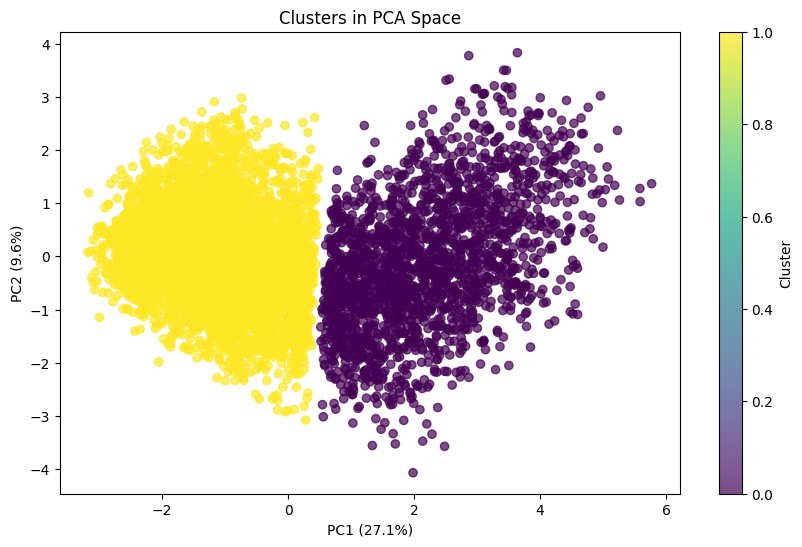

In [32]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(comb_df)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(
    pca_result[:,0], pca_result[:,1],
    c=comb_df['clusters'], cmap='viridis', alpha=0.7
)
plt.title('Clusters in PCA Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.colorbar(label='Cluster')
plt.show()

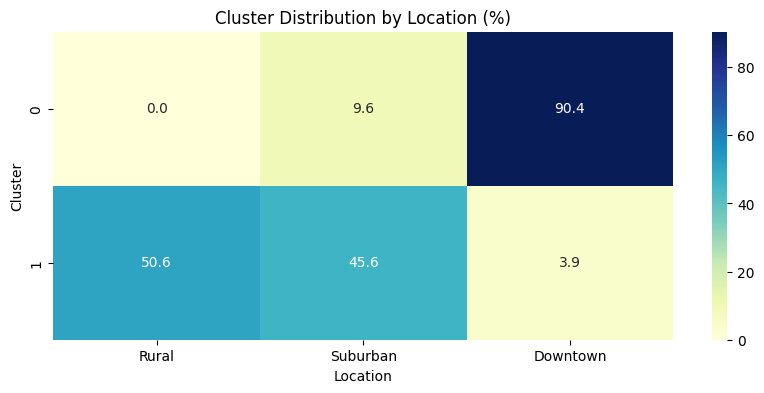

In [33]:
# Example data (you would use your actual data here)
# data = your_dataframe

# Create contingency table
ct = pd.crosstab(data['clusters'], data['Location'], normalize='index') * 100

# Rename the columns to reflect the actual location names
ct.columns = ['Rural', 'Suburban', 'Downtown']

# Visualize
plt.figure(figsize=(10, 4))
sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cluster Distribution by Location (%)")
plt.ylabel("Cluster")
plt.xlabel("Location")
plt.show()

In [34]:
#Map the clusters to 'nonurban' and 'urban'
data['clusters'] = data['clusters'].map({0: 'urban', 1: 'nonurban'})


Location vs Cluster: p-value = 0.0000


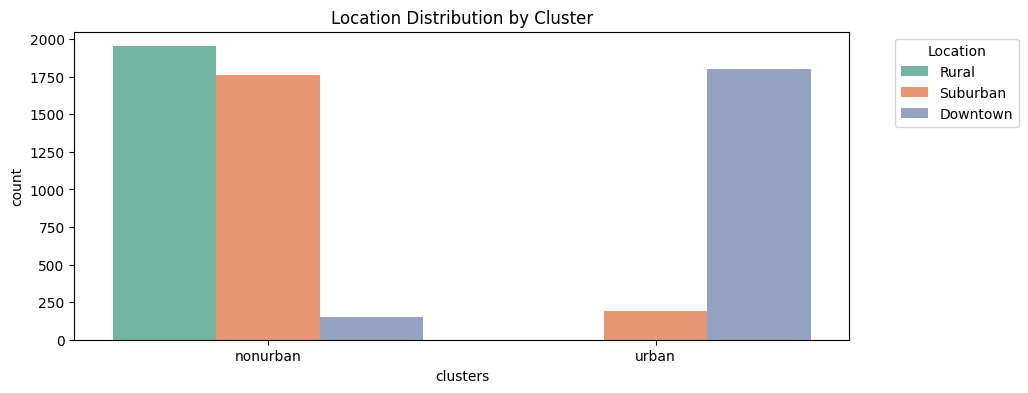

Meal Price Category vs Cluster: p-value = 0.6519


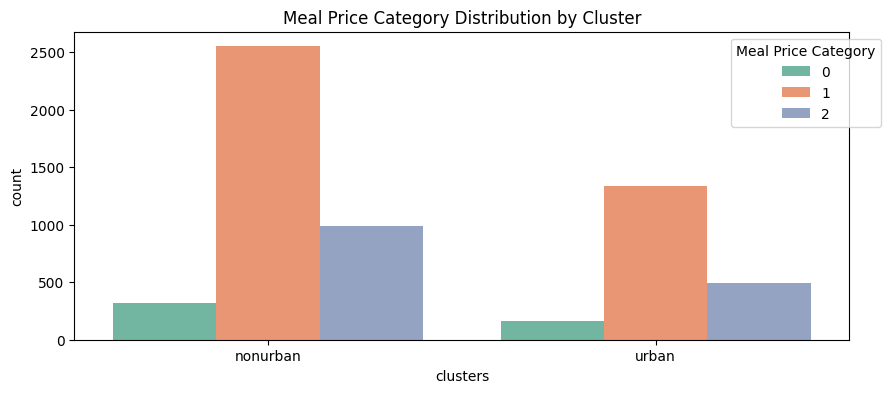

Cuisine vs Cluster: p-value = 0.3442


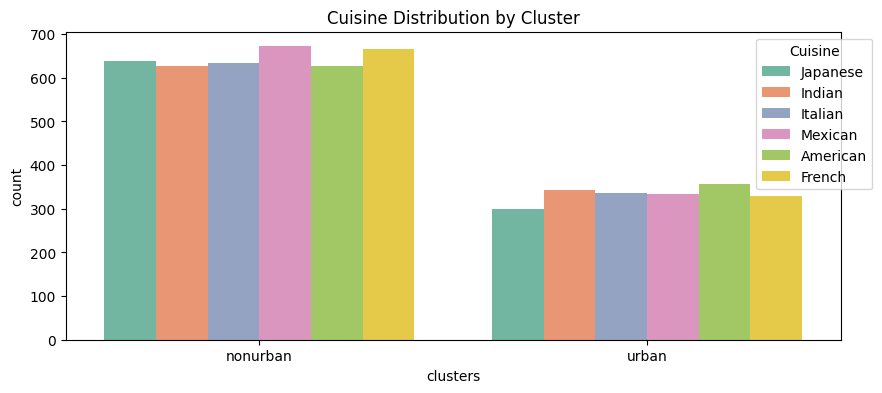

Parking Availability vs Cluster: p-value = 0.6443


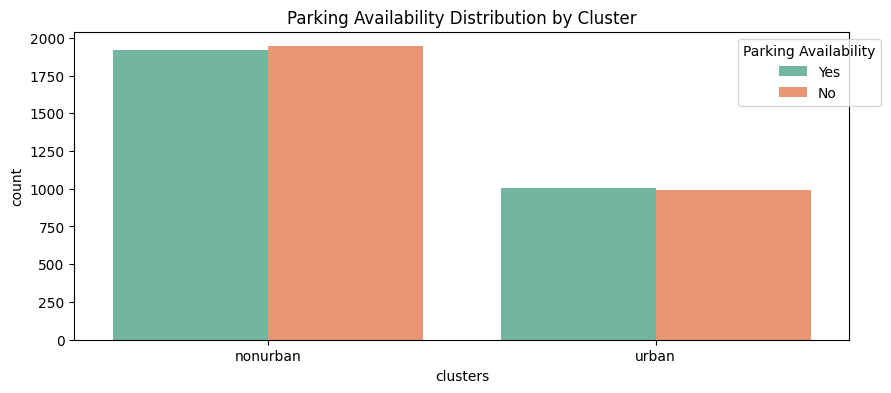

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

# Define mapping for the Location variable
location_mapping = {0: "Rural", 1: "Suburban", 2: "Downtown"}

# For each categorical variable
for cat_var in ordinal_categorical:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=data, x='clusters', hue=cat_var, palette='Set2')

    # Get unique category values
    handles, labels = ax.get_legend_handles_labels()
    
    # If the variable is 'Location', map the numeric labels to original names
    if cat_var == "Location":
        labels = [location_mapping[int(label)] for label in labels]

    plt.legend(handles, labels, title=cat_var, bbox_to_anchor=(1.05, 1))
    plt.title(f'{cat_var} Distribution by Cluster')

    # Chi-square test
    crosstab = pd.crosstab(data['clusters'], data[cat_var])
    chi2, p, _, _ = chi2_contingency(crosstab)
    print(f"{cat_var} vs Cluster: p-value = {p:.4f}")

    plt.show()


In [36]:

def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Calculate for all categorical variables
results = []
for cat_var in ordinal_categorical:
    crosstab = pd.crosstab(data['clusters'], data[cat_var])
    v = cramers_v(crosstab.values)
    results.append({'Variable': cat_var, "Cramér's V": v})
    
# Create results dataframe
cramer_results = pd.DataFrame(results).sort_values("Cramér's V", ascending=False)
print(cramer_results)

               Variable  Cramér's V
0              Location    0.873975
2               Cuisine    0.030996
1   Meal Price Category    0.012087
3  Parking Availability    0.006033
